In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=8e481cbe018f3b7ea9199afcc5a98e867212b52f803e2ddc828877a26271f701
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [3]:
import pandas as pd
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [4]:
import sys 
sys.path.append("/content/drive/MyDrive/Introduction to Business Analytics")

from eda.eda import correlation
from eda.visualization import *

# **1. Load data**

In [5]:
spark = SparkSession.builder.master("local[2]").appName("Employee_Attrition").getOrCreate()

data_path = '/content/drive/MyDrive/Introduction to Business Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv'
schema_fields = []

data = pd.read_csv(data_path)
for col_index in range(data.shape[1]):
  field_name = data.columns[col_index]
  field_type = data.dtypes[col_index]

  if field_type == 'int64':
    schema_fields.append(
        StructField(field_name, FloatType(), nullable = True)
    )
  elif field_type == 'object':
        schema_fields.append(
        StructField(field_name, StringType(), nullable = True)
    )

df = spark.read.csv(path=data_path, schema= StructType(schema_fields)).cache()

In [6]:
df = spark.read.csv(path=data_path, schema= StructType(schema_fields)).cache()
df = df.where(df.EmployeeNumber.isNotNull())

df = df.where(df.EmployeeNumber.isNotNull())
df.show()

+----+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+--------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+
| Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EmployeeNumber|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|Over18|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkLifeBala

In [7]:
discrete_attributes = ["NumCompaniesWorked", "TrainingTimesLastYear", ]
continous_attributes = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", 
                        "MonthlyRate", "PercentSalaryHike", "TotalWorkingYears",
                        "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
categorical_attributes = ["Department", "EducationField", 
                          "Gender", "JobRole", "MaritalStatus"]
ordinal_attributes = ["BusinessTravel", "Education", "EnvironmentSatisfaction", "JobInvolvement", 
                      "JobLevel", "JobSatisfaction", "PerformanceRating",  "OverTime", 
                      "RelationshipSatisfaction", "StockOptionLevel",
                      "WorkLifeBalance"]
numeric_attributes = discrete_attributes + continous_attributes

target_name = "Attrition"

#**2 Explanatory Data Analysis**

##**2.1 Correlation**

Spearman correlation heatmap of numeric and ordrinal variables.

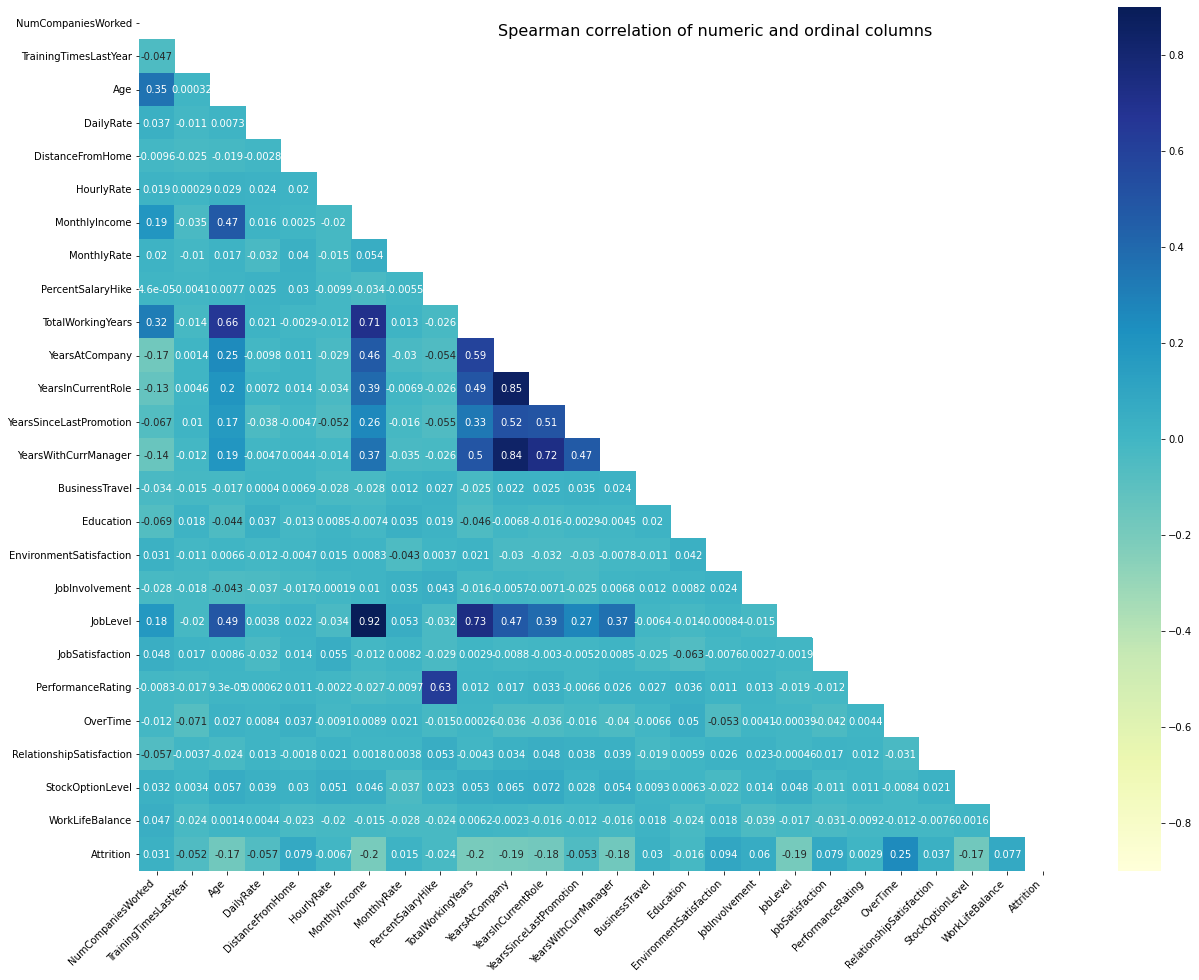

In [8]:
fig = correlation_heatmap(df, ordinal_attributes, numeric_attributes)
fig.suptitle("Spearman correlation of numeric and ordinal columns", size= 16)
plt.show()

##**2.2 Numeric variables**

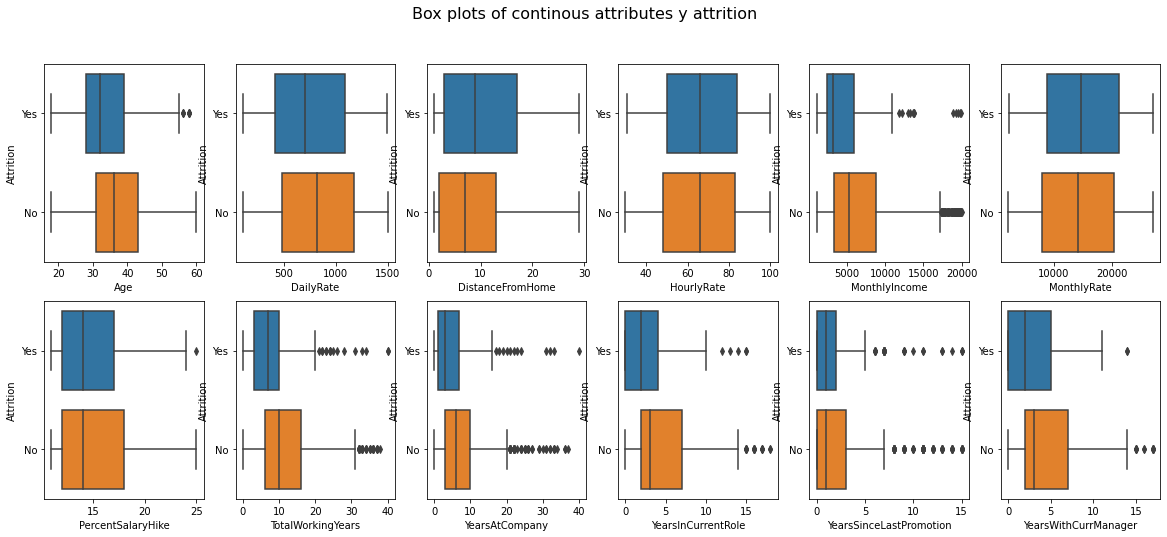

In [9]:
fig = continous_plot(dataset= df, continous_attributes= continous_attributes, plot_type= 'boxplot')
fig.suptitle("Box plots of continous attributes y attrition", size= 16)

plt.show()

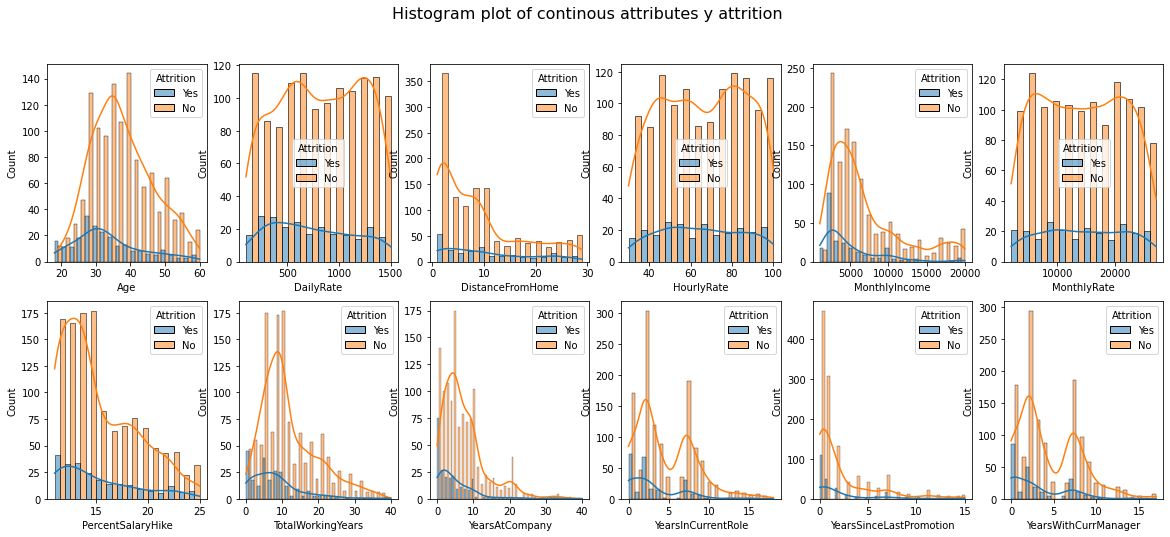

In [10]:
fig = continous_plot(dataset= df, continous_attributes= continous_attributes, plot_type= 'histplot')
fig.suptitle("Histogram plot of continous attributes y attrition", size= 16)

plt.show()

## **2.3 Ordinal variables**

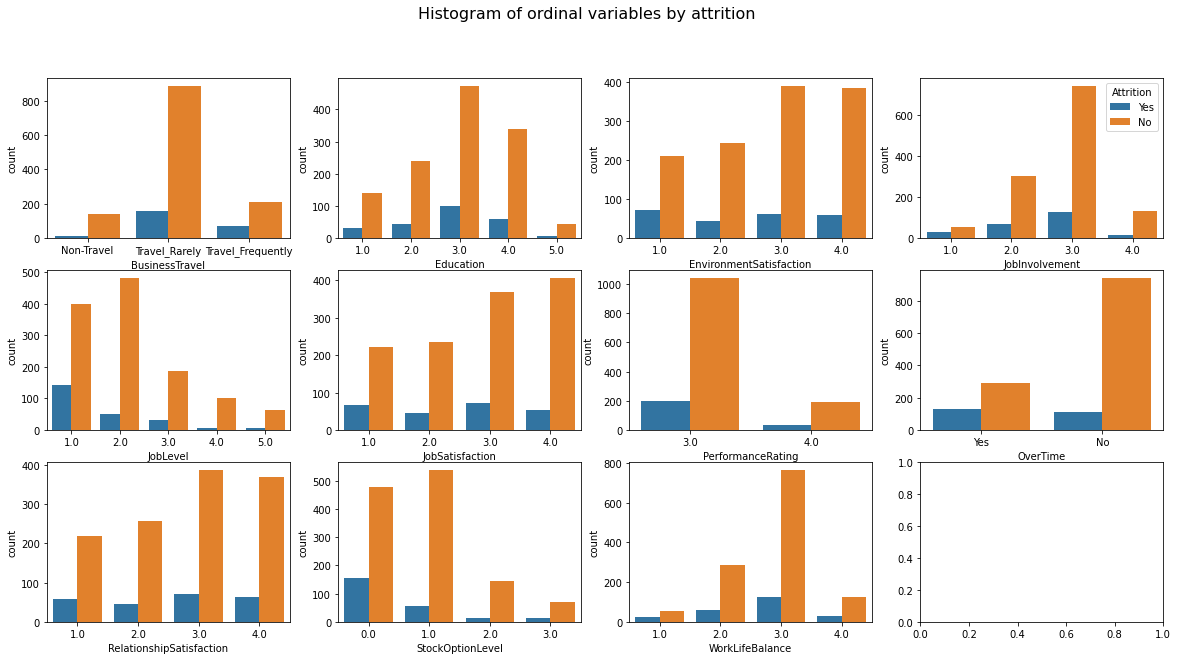

In [15]:
fig = eda.visualization.hist_ordinal(df, ordinal_attributes)
plt.show()

##**2.4 Categorical variables**

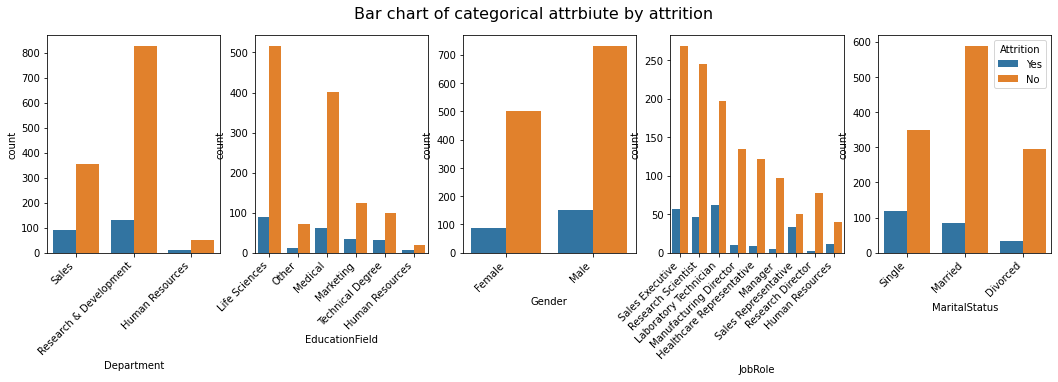

In [18]:
fig = categorical_plot(df, categorical_attributes, plot_type = 'countplot')
fig.suptitle("Bar chart of categorical attrbiute by attrition", size = 16)

plt.show()

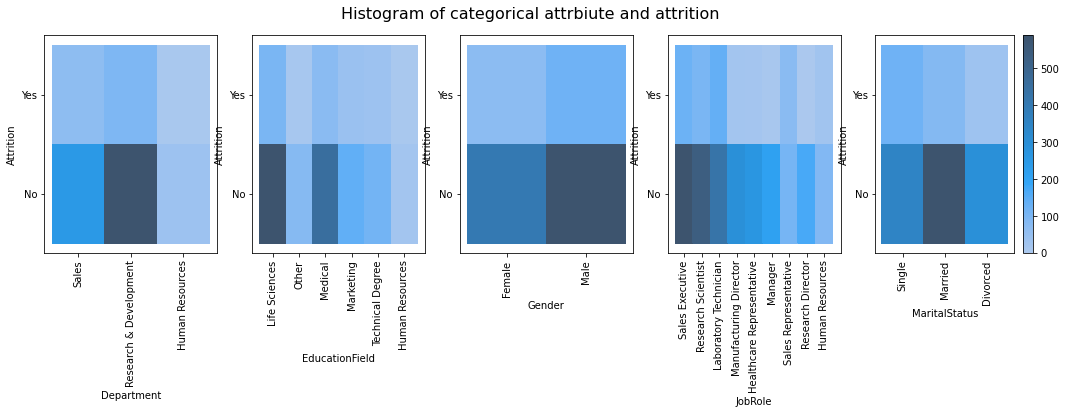

In [16]:
fig = categorical_plot(df, categorical_attributes, plot_type = 'histplot')
fig.suptitle("Histogram of categorical attrbiute and attrition", size = 16)

plt.show()